# Notifying trade timing by email or telegram

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas_datareader import data as pdr
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from telegram import Bot
from telegram.constants import ParseMode

In [8]:
# 株価データの獲得
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"
yf.pdr_override()
# yahooサイトからデータをダウンロード
stock_data = pdr.get_data_yahoo(stock_symbol, start_date, end_date)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200


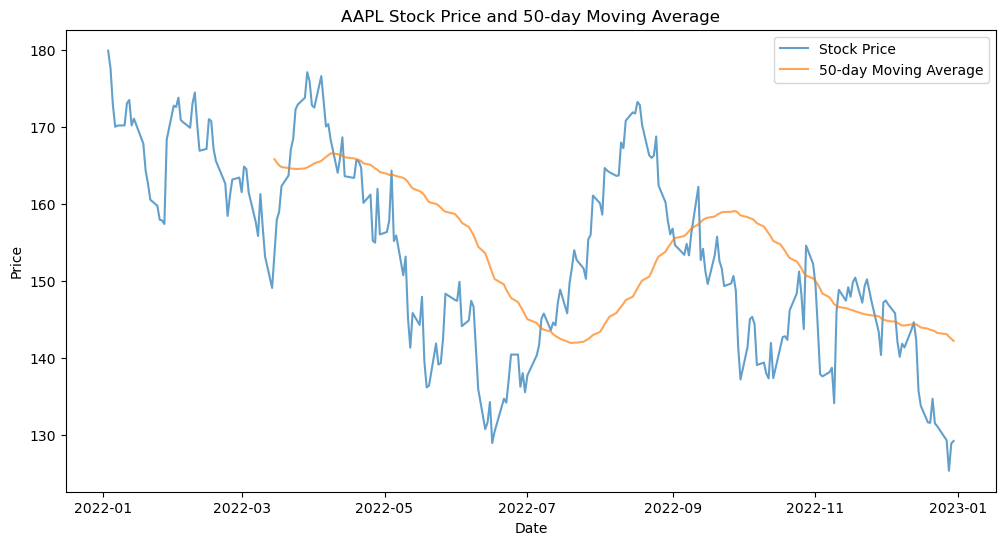

In [9]:
# Calculate 50-day moving average
stock_data['50-day MA'] = stock_data['Adj Close'].rolling(window=50).mean()

# Visualize stock price and moving average
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price', alpha=0.7)
plt.plot(stock_data.index, stock_data['50-day MA'], label='50-day Moving Average', alpha=0.7)
plt.title(f"{stock_symbol} Stock Price and 50-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Replace these with your email and Telegram bot details
email_sender = 'your_email@gmail.com'
email_password = 'your_email_password'
telegram_token = 'your_telegram_token'
chat_id = 'your_chat_id'

# Function to send an email alert
def send_email(subject, body):
    msg = MIMEMultipart()
    msg['From'] = email_sender
    msg['To'] = email_sender
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(email_sender, email_password)
        text = msg.as_string()
        server.sendmail(email_sender, email_sender, text)

# Function to send a Telegram alert
def send_telegram_alert(message):
    bot = Bot(token=telegram_token)
    bot.send_message(chat_id=chat_id, text=message, parse_mode=ParseMode.MARKDOWN)

# Sample usage
buying_alert_message = "🚀 *Buy Alert:* Significant buying activity detected for {}.".format(stock_symbol)
selling_alert_message = "🔻 *Sell Alert:* Significant selling activity detected for {}.".format(stock_symbol)

# Send email and Telegram alerts based on your analysis
# Replace the conditions below with your own analysis criteria
if stock_data['Volume'].iloc[-1] > 2 * stock_data['Volume'].mean():
    send_email("Buy Alert", "Significant buying activity detected for {}.".format(stock_symbol))
    send_telegram_alert(buying_alert_message)
elif stock_data['Volume'].iloc[-1] > 2 * stock_data['Volume'].mean():
    send_email("Sell Alert", "Significant selling activity detected for {}.".format(stock_symbol))
    send_telegram_alert(selling_alert_message)